### **The task is to predict the number of O-rings that will experience thermal distress for a given flight when the launch temperature is below freezing.** 


In [ ]:
# libraries 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Read the given CSV file, and view some sample records

header = ["RingsAtRisk","RingsAtDistress","Temperature", "LeakCheckPressure", "TemporalOrder"]
ringErosion = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/o-ring-erosion-or-blowby.data", sep=" ", names=header)
ringErosion

,RingsAtRisk,RingsAtDistress,Temperature,LeakCheckPressure,TemporalOrder
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


## Understand the data


In [ ]:
# Shape of our dataset
print("----------------------")
print("Shape of dataset")
print(ringErosion.shape)
print("----------------------")
print("--------------------------------------------------------------------")

# Info our dataset
print("Info on dataset")
ringErosion.info()
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")


# Describe our dataset
print("Description of dataset")
print(ringErosion.describe())
print("--------------------------------------------------------------------------")
print("--------------------------------------------------------------------------")

# Number of unique values in each column
print("Number of Unique values in each column")
for names in ringErosion.columns:
  print(names,":",ringErosion[names].unique())
print("--------------------------------------------------------------------------")
print("--------------------------------------------------------------------------")

----------------------
Shape of dataset
(23, 5)
----------------------
--------------------------------------------------------------------
Info on dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   RingsAtRisk        23 non-null     int64
 1   RingsAtDistress    23 non-null     int64
 2   Temperature        23 non-null     int64
 3   LeakCheckPressure  23 non-null     int64
 4   TemporalOrder      23 non-null     int64
dtypes: int64(5)
memory usage: 1.0 KB
--------------------------------------------------------------------
--------------------------------------------------------------------
Description of dataset
       RingsAtRisk  RingsAtDistress  Temperature  LeakCheckPressure  \
count         23.0        23.000000    23.000000          23.000000   
mean           6.0         0.391304    69.565217         152.173913   
std     

#### We can drop **TemporalOrder** of flight, since it is same as index and also number of **RingsAtRisk** as it has only one unique value,so it will not be of use to our analysis.

In [ ]:
ringErosion = ringErosion.drop(["TemporalOrder","RingsAtRisk"], axis=1)

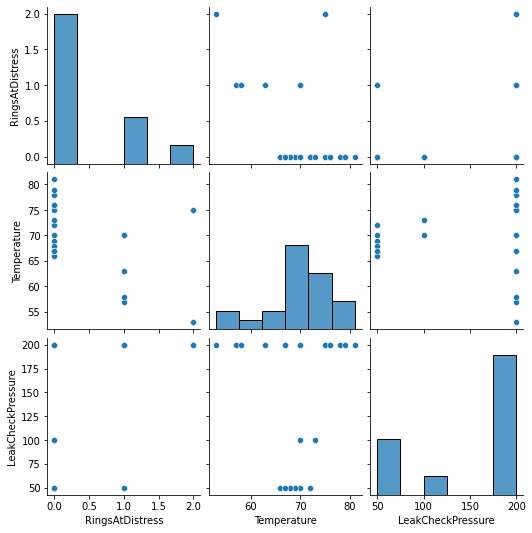

In [ ]:
#Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(ringErosion)
plt.show()

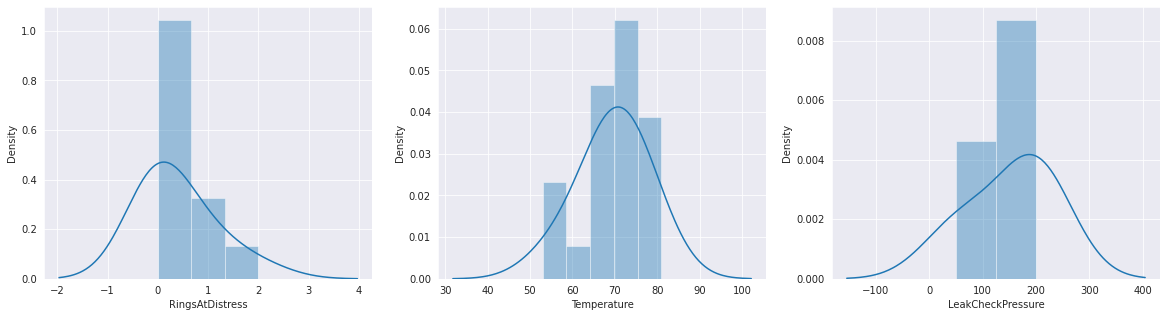

In [ ]:
def drawDistPlot(temp_df):
    plt.figure(figsize=(20, 5))
    i_count = 1
    sns.set_style("darkgrid")
    for col in temp_df:
        plt.subplot(1,3,i_count)
        fig = sns.distplot(temp_df[col], kde_kws={'bw': 1})
        i_count = i_count+1
    plt.show()
drawDistPlot(ringErosion)

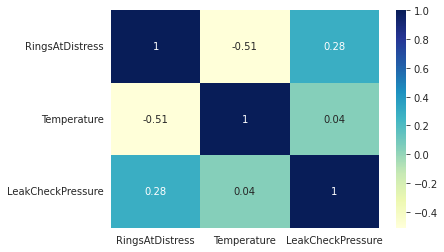

In [ ]:
# Visualizing the data using heatmap
sns.heatmap(ringErosion.corr(), cmap="YlGnBu", annot = True)
plt.show()


I wanted to make a predictive model to observe the O-ring erosion at different temperatures. I used regression model to predict what would be an optimal temperature to support O-rings. To do this, I utilized the statsmodel package, and  used the ols method from statsmodelto estimate unknown parameters in this model. From OLS method we get intercept, slope, and as well as the R-squared value.

In [ ]:
#Creating X and Y
X=ringErosion[["Temperature", "LeakCheckPressure"]]
y= ringErosion["RingsAtDistress"]

### Creating train ad test set

In [ ]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

### Building and training the model

In [ ]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:        RingsAtDistress   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     9.545
Date:                Fri, 24 Feb 2023   Prob (F-statistic):            0.00281
Time:                        02:10:45   Log-Likelihood:                -7.2874
No. Observations:                  16   AIC:                             20.57
Df Residuals:                      13   BIC:                             22.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5754      1.17

1.   The coefficient for temperature is -0.0658, and its corresponding p-value is 0.002(very low). That means the coefficient is statistically significant. 

2. The coefficient for LeakCheckPressue is 0.0019 andits corresponding p-value is 0.002 , again very low. It mean that coefficient is statistically significant

3.  Adjusted R-squared value is 0.533, which means that 53.3% of the varience in rings at distress can be explained by the temperature and pressure using this regression model.

Text(0.5, 0.98, 'Multi-Linear Regression Model Visualization (R2 = 0.5948783048116594)')

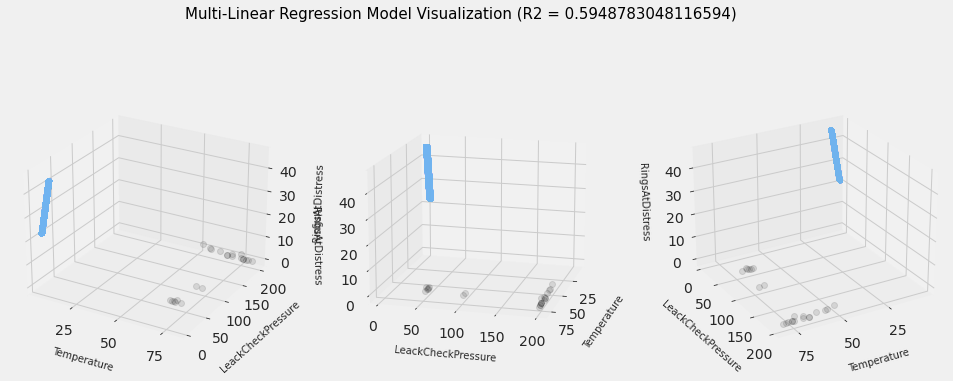

In [ ]:
# Plotting a 3-D plot for visualizing the Multiple Linear Regression Model  
  
# Preparing the data  
independent = ringErosion[['Temperature', 'LeakCheckPressure']].values.reshape(-1,2)  
dependent = ringErosion['RingsAtDistress']  
  
# Creating a variable for each dimension  
x = independent[:, 0]  
y = independent[:, 1]  
z = dependent  
  
x_range = np.linspace(5, 10, 35)    
y_range = np.linspace(3, 6, 35)   
x1_range = np.linspace(3, 6, 35)  
x_range, y_range, x1_range = np.meshgrid(x_range, y_range, x1_range)  
viz = np.array([x_range.flatten(), y_range.flatten(), x1_range.flatten()]).T  
  
# Predicting O-rings at distress using the linear regression model built above  
predictions = lr.predict(viz)  
  
# Evaluating the model using the R2 square of the model  
r2 = lr.rsquared
  
# Ploting the model for visualization  
plt.style.use('fivethirtyeight')  
  
# Initializing a matplotlib figure  
fig = plt.figure(figsize = (15, 6))  
  
axis1 = fig.add_subplot(131, projection = '3d')  
axis2 = fig.add_subplot(132, projection = '3d')  
axis3 = fig.add_subplot(133, projection = '3d')  
  
axes = [axis1, axis2, axis3]  
  
for ax in axes:  
    ax.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'o', alpha = 0.1)  
    ax.scatter(x_range.flatten(), y_range.flatten(), predictions, facecolor = (0,0,0,0), s = 20, edgecolor = '#70b3f0')  
    ax.set_xlabel('Temperature', fontsize = 10, labelpad = 10)  
    ax.set_ylabel('LeackCheckPressure', fontsize = 10, labelpad = 10)  
    ax.set_zlabel('RingsAtDistress', fontsize = 10, labelpad = 10)  
    ax.locator_params(nbins = 3, axis = 'x')  
    ax.locator_params(nbins = 3, axis = 'x')  
  
axis1.view_init(elev=25, azim=-60)  
axis2.view_init(elev=15, azim=15)  
axis3.view_init(elev=25, azim=60)  
  
fig.suptitle(f'Multi-Linear Regression Model Visualization (R2 = {r2})', fontsize = 15, color = 'k')  

### Residual Analysis

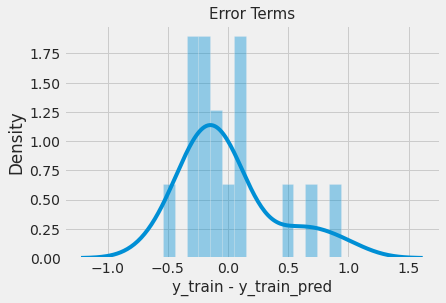

In [ ]:
# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [ ]:
temp=31
for pressure in [0,50,100,200]:
  erosion_pred=4.5754-0.0658*temp+0.0019*pressure 
  print("Ring erosion at temperature 31F and at pressure ", pressure, "is",erosion_pred)


Ring erosion at temperature 31F and at pressure  0 is 2.5356
Ring erosion at temperature 31F and at pressure  50 is 2.6306000000000003
Ring erosion at temperature 31F and at pressure  100 is 2.7256
Ring erosion at temperature 31F and at pressure  200 is 2.9156
